NAME : ANBUSELVAN MAHALINGAM

SUBJECT : DSC 630 PREDICTIVE ANALYSIS - WEEK 3 ASSIGNMENT

In [37]:
import pandas as pd

# To load the data from the csv file
dodgers_data = pd.read_csv("dodgers-2022.csv")

# To display first 5 row of data
dodgers_data.head(n=5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [38]:
# To explore and understand more on dataset
dodgers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [39]:
# To find if any duplicate rows in the dataset 
duplicates = dodgers_data.duplicated()
print("Duplicate Rows:")
print(dodgers_data[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [month, day, attend, day_of_week, opponent, temp, skies, day_night, cap, shirt, fireworks, bobblehead]
Index: []


In [40]:
# To find if rows with any NaN values
rows_with_nan = dodgers_data[dodgers_data.isna().any(axis=1)]
print("Rows with any NaN values:")
print(rows_with_nan)

Rows with any NaN values:
Empty DataFrame
Columns: [month, day, attend, day_of_week, opponent, temp, skies, day_night, cap, shirt, fireworks, bobblehead]
Index: []


In [41]:
# To explore and understand more on dataset
dodgers_data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


The dataset has maximum attendance 56000 and minimum attendance 24312 and there is no duplicate rows and no columns with null values

In [42]:
# we can make use of Linear regression ML model to identify importat feture .

# one-hot encoding
dodgers_data_encoded = pd.get_dummies(dodgers_data, drop_first=True) 

In [43]:
# To split the dataset into training(80%) and test(20%) dataset

from sklearn.model_selection import train_test_split

X = dodgers_data_encoded.drop('attend', axis=1)
y = dodgers_data_encoded['attend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)


In [44]:
# To apply Linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)



In [45]:
# To extract the important feature
feature_importance = pd.DataFrame(model.coef_, X.columns, columns=['coefficient'])

In [46]:
feature_importance 

,coefficient
day,-50.838397
temp,-368.796621
month_AUG,13035.248840
month_JUL,14492.153704
month_JUN,12069.396225
month_MAY,7679.077730
month_OCT,10683.653509
month_SEP,15739.629217
day_of_week_Monday,21872.182375
day_of_week_Saturday,22209.313667


In [47]:
print("R2 value of the model:", r2)
print("MAE value of the model:", mae)

R2 value of the model: -0.13464117508185636
MAE value of the model: 7758.27749943649


Summary:

    The Negative r2 value describes the linear regression model does not explain the variance in the attendance data well.The MAE value of 7758.27749943649 tells us that, on average, the model's attendance predictions are about 7758 attendees away from the actual values.

    The Coefficient values indicates the relationship between each feature and the target variable attendance.
    
    Positive coefficients increase the predicted attendance and the negative coefficients decrease the predicted attendance.

    Here the model does not capture the required relationships in the dataset and does not explain it well, so we may have to find better solution and additional evidence.

In [48]:
# we can make use of basic EDA 

# To load the data from the csv file
dodgers_df = pd.read_csv("dodgers-2022.csv")


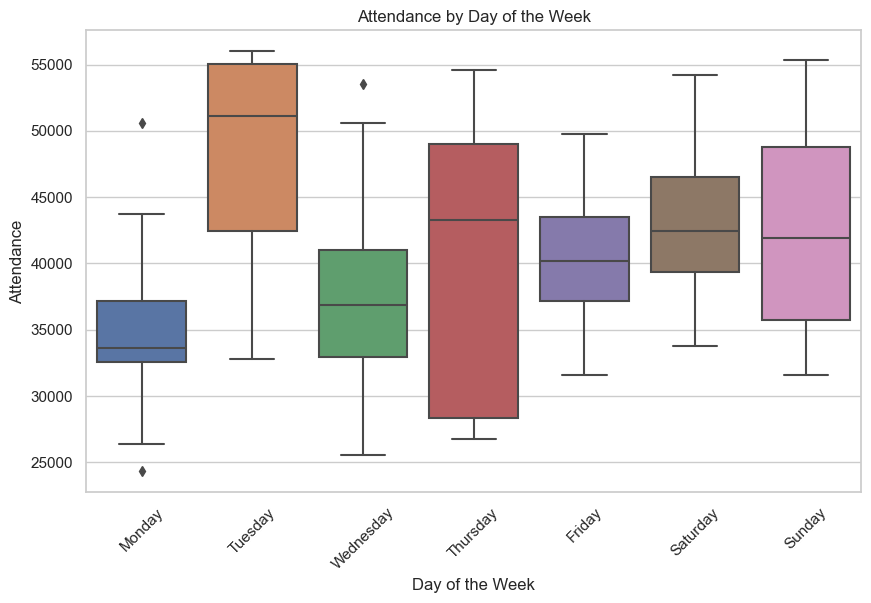

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns

#assumption - Weekends will have more attendance to the games

# To set up the aesthetic style of the plots
sns.set(style="whitegrid")
# To plot attendance by the day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='attend', data=dodgers_df, 
            order=['Monday', 'Tuesday',
                   'Wednesday', 'Thursday', 
                   'Friday', 'Saturday', 'Sunday'])
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

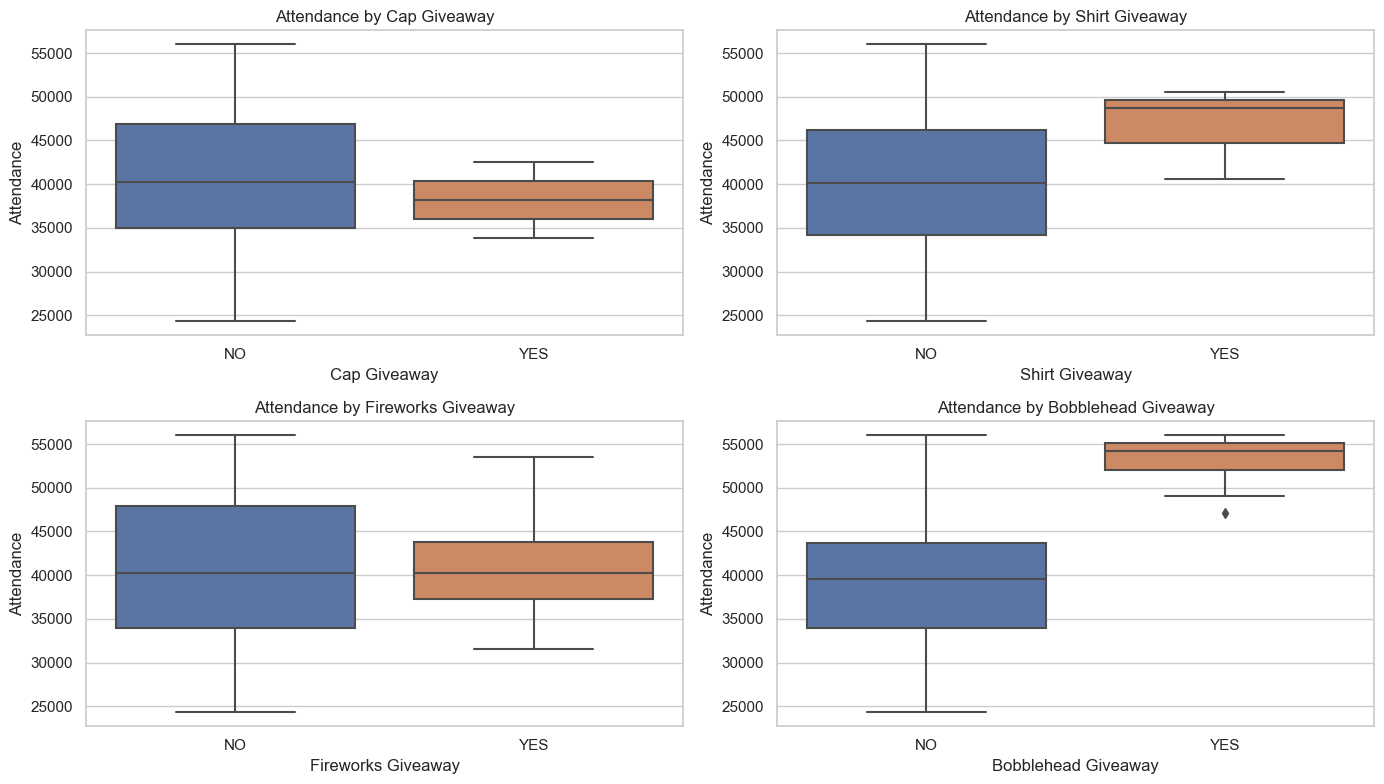

In [50]:
#assumption - Days with give away will have more attendance to the game
# Plotting attendance by promotional items (caps, shirts, fireworks, bobbleheads)
promotional_items = ['cap', 'shirt', 'fireworks', 'bobblehead']
plt.figure(figsize=(14, 8))
for i, item in enumerate(promotional_items, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=item, y='attend', data=dodgers_df)
    plt.title(f'Attendance by {item.title()} Giveaway')
    plt.xlabel(f'{item.title()} Giveaway')
    plt.ylabel('Attendance')
plt.tight_layout()
plt.show()


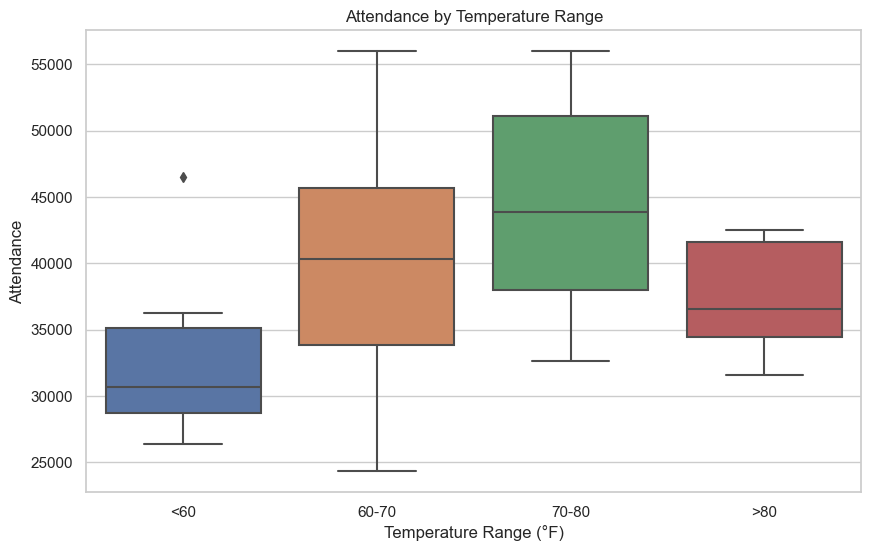

In [51]:
# Analyzing attendance by temperature range

import warnings # to supress wanrning
warnings.filterwarnings('ignore')

#assumption - Days with warn will have more attendance
# days with temperature betwen 60 to 80 are considered good warn temperature
# Creating a new column for temperature range
dodgers_df['temp_range'] = pd.cut(dodgers_df['temp'], 
                                    bins=[0, 60, 70, 80, 100], 
                                    labels=['<60', '60-70', '70-80', '>80'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_range', y='attend', data=dodgers_df)
plt.title('Attendance by Temperature Range')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Attendance')
plt.show()

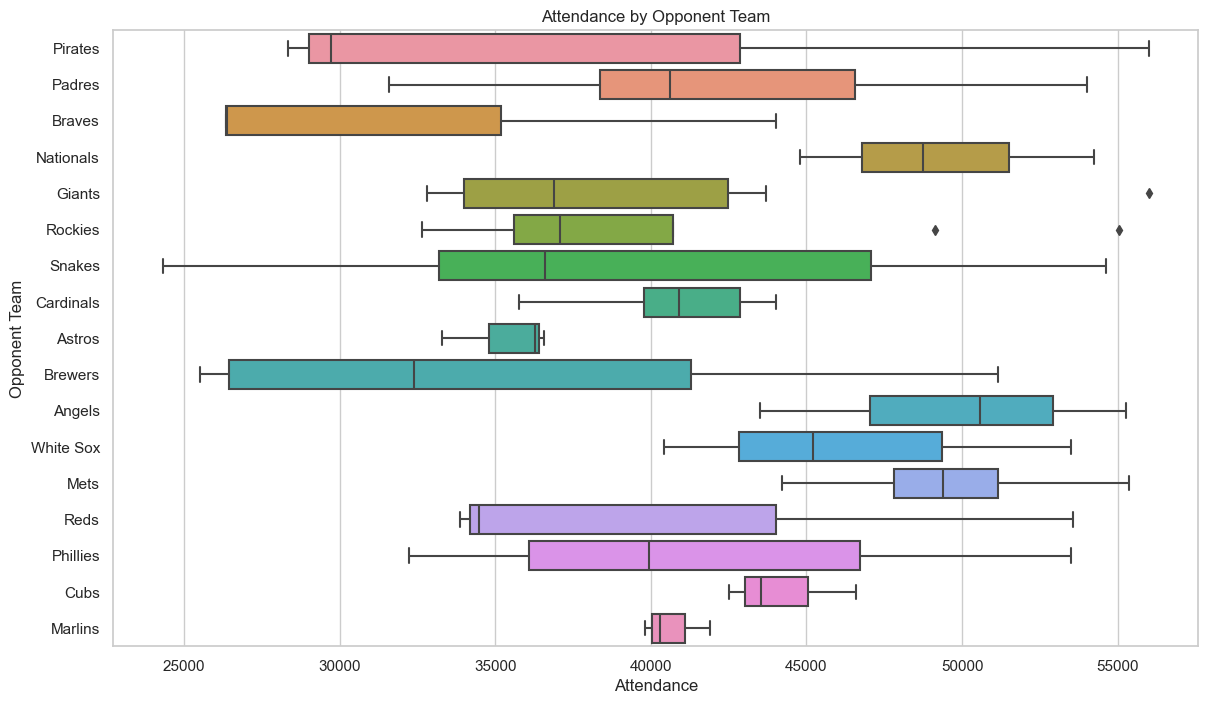

In [52]:
# Analyzing attendance by opponent team

#assumption - Games with popular opponenet team will have maximum attendance
plt.figure(figsize=(14, 8))
sns.boxplot(x='attend', y='opponent', data=dodgers_df)
plt.title('Attendance by Opponent Team')
plt.xlabel('Attendance')
plt.ylabel('Opponent Team')
plt.show()

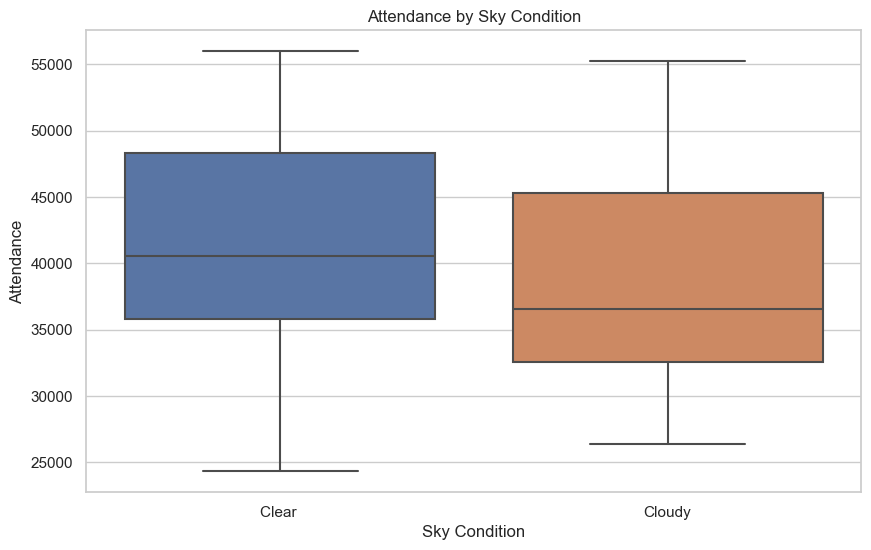

In [53]:
# Analyzing attendance by skies condition

#assumption - clear sky will have maximum attendance
plt.figure(figsize=(10, 6))
sns.boxplot(x='skies', y='attend', data=dodgers_df)
plt.title('Attendance by Sky Condition')
plt.xlabel('Sky Condition')
plt.ylabel('Attendance')
plt.show()

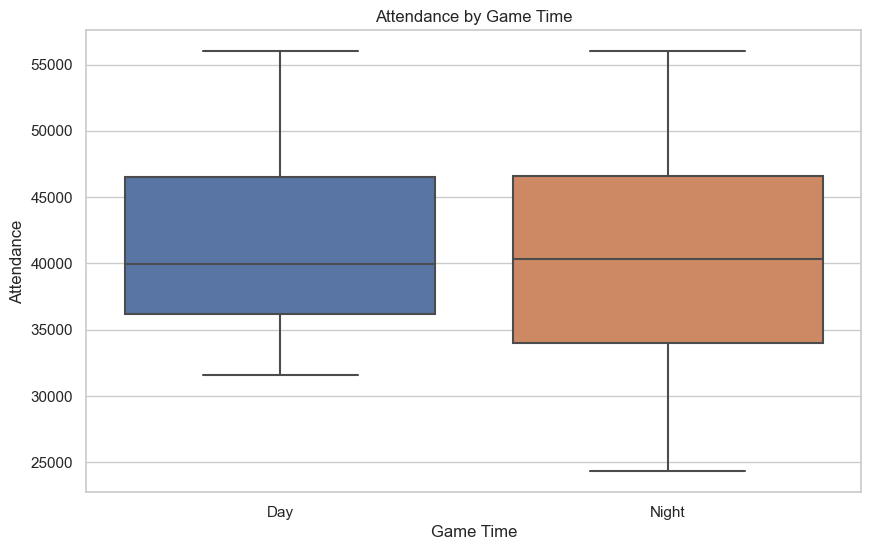

In [54]:
# Analyzing attendance by game time (Day/Night)

#assumption - Day matches will have maximum attendance than night.
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_night', y='attend', data=dodgers_df)
plt.title('Attendance by Game Time')
plt.xlabel('Game Time')
plt.ylabel('Attendance')
plt.show()

Summary:

Assumptions:

    Weekends will have more attendance to the games, as people will have free time to come for the games.
    Days with giveaway will have more attendance to the game, as people love to get free items.
    Days with warm will have more attendance, as people love to spend time in outdoor events. 
    Games with popular opponent team will have maximum attendance, as people like the match against popular teams.
    Clear sky will have maximum attendance, as people love to spend time in outdoor events.
    Day matches will have maximum attendance than night, easier to commute home after the games.

    Overall, the Linear Regression model does not provide clear evidence and information about the impacting variables on the target variable, but we were able to get some general idea about the variables and their importance towards attendance. Along with the EDA box-plot, we can understand the variables' importance.
    
    Overall, our assumptions are true: days with good, warm temperatures, clear skies, mid-year months (July, August, and September), weekend games, and days with promotional giveaway items are considered as peak attendance periods. 
    
    Suggestions for the management to maximize attendance: Focusing on scheduling games with good warm temperatures plays a crucial role in attracting more attendance. Based on current data, days with good warm temperatures (60-80°F) around the summer season months (July, August, and September), daytime, clear sky have the potential to get more attendance for the game.
    
    It is also evident that giveaway items help to get more attendance compared to the days with no giveaway items. Bobblehead and shirt giveaways help better than cap giveaways and fireworks days, so management should consider utilizing cap giveaway and fireworks spending for bobblehead giveaways.    

    Games with popular opponent team Nationals, Angels, Mets sems to be getting higher audience than games with team Atros and Brewers, management can focus on scheduling more games against Nationals, Angels, Mets during peak times.
    